# PROJECT: NO-SHOW APPOINTMENT

## Introduction

This project analyses the data of 100,000 patients in Brazil. We want to better understand what factors influence a patients to keep his appoint. In this project we will carry out the following processes for our analysis:

<ul>
    <li><a href='#wrangle'>Wrangle Data Set</a></li>
    <li><a href="#explore">Exploratory Data Analysis</a></li>
    <li><a href="#conclusion">Conclusions</a></li>
</ul>

## Dataset Description

01 - PatientId:Identification of a patient</br>
02 - AppointmentID:Identification of each appointment</br>
03 - Gender:Male or Female . Gender of Patient.</br>
04 - Age:How old is the patient.</br>
05 - Neighbourhood:Where the appointment takes place.</br>
06 - Scholarship:True of False .</br>
07 - Hipertension:True or False.</br>
08 - Diabetes:True or False</br>
09 - Alcoholism:True or False</br>
10 - Handcap:True or False</br>
11 - SMS_received:1 or more messages sent to the patient.
12 - No-show:True or False. Customer doesn't show for appointment </br>




## Questions for analysis

- What day of the week do patients mostly miss appointments?
- Are there seasonal variations or monthly variations ?
- How does Gender affect the appointments?
- Are there specific hospitals that have prevalent missed appointments?


In [132]:
# Let's import packages for the project

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from calendar import day_name

dataset = pd.read_csv('noshow.csv')

<a id='wrangle'></a>
## WRANGLING OUR DATASET

Data wrangling is the process of cleaning our data. But first before we can clean our data let's have a quick view of the structure of our dataset. 

In [133]:
# Check No of Rows and Columns in the dataset
print('No of Records:{} \nNo of Columns:{}'.format(dataset.shape[0], dataset.shape[1]))

No of Records:110527 
No of Columns:14


>  The above code shows we have 14 columns and 110527 appointments. Next we check the structure of the columns to know if there are null values and data types of the columns.

In [134]:
# Check the datatypes of columns and columns with null values

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The result above shows we do not have a problem with nulls. However,there are some issues we need to fix.

ScheduledDay and AppointmentDay needs to be converted from object to datetime so we can analyse by the day of the week. 


In [135]:
# Change Datatypes
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay'])
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

> Great, we casted the object data type to datetime and can now use date functions to work with the column. Next, let's create categorical variables to hold columns we need. Before that we will create new column for Day of the Week for Appointments and Month for Appointments.

In [136]:
# Create Day of Week 
dataset['DayOfWeek'] = dataset['AppointmentDay'].dt.day_name()
dataset['DayNo'] = dataset['AppointmentDay'].dt.dayofweek
dataset['MonthName'] = dataset['AppointmentDay'].dt.month_name()
dataset['MonthNo'] = dataset['AppointmentDay'].dt.month
#select the relevant columns for this analysis
categorical_data = [x for x in dataset.columns if x not in ['ScheduledDay','AppointmentDay','PatientId','AppointmentID'] ]
dataset = dataset[categorical_data]
dataset.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,DayOfWeek,DayNo,MonthName,MonthNo
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,4,April,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,4,April,4
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,4,April,4
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,4,April,4
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,4,April,4


> Great ! We are making some progress and the new engineered columns - DayofWeek and Month, can give more insights.

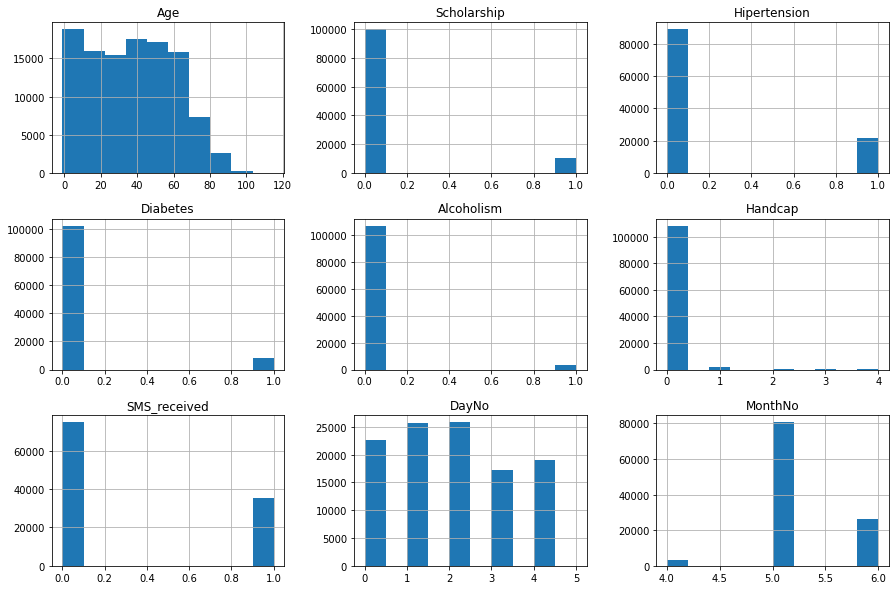

In [137]:
dataset.hist(figsize=(15,10));

> The above histogram shows the spread of the data by different variables. Now let's dive further to see some statistics of the columns.

In [138]:
dataset.describe()


,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DayNo,MonthNo
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.858243,5.210048
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.371672,0.473780
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,6.000000


Interesting. As shown in the statistics the mean age of the patients is about 37 yrswhile the minimum age is -1. 
We need to replace the age with 0. We assume this might be a new born baby. Here are some other key stats:
> - 70% of participants are not on welfare program.
> -  40% are hypertensive, 26% are diabetic
> -  26% are diabetic
> -  16% are handicap
> -  47% received SMS

In [139]:
# replace -1 age with 0

dataset.loc[dataset['Age']<0,'Age'] =0
dataset.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,DayNo,MonthNo
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088883,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.858243,5.210048
std,23.110190,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.371672,0.473780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,5.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,5.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,6.000000


> Great, we were ableto update the age with 0.Now let's answer our questions for analysis.

Total No Of Patients : 110527
Did Not Miss Appointment:88208
Missed Appointment:22319


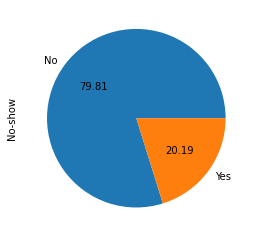

In [140]:
# What is the trend for appoints for each day of the weeek?

DayOfWeek = dataset['No-show'].value_counts()
TotalNoOfPatients = dataset.shape[0]
TotalNoThatMissed = dataset.loc[dataset['No-show']=='Yes','No-show'].count()
TotalNoThatShowed = dataset.loc[dataset['No-show']=='No','No-show'].count()

print("Total No Of Patients : {}\nDid Not Miss Appointment:{}\nMissed Appointment:{}".format(TotalNoOfPatients,TotalNoThatShowed,TotalNoThatMissed))
dataset['No-show'].value_counts().plot(kind='pie',autopct='%.2f', y='No-show', fontsize=10, figsize=(4,10));


#DayOfWeek_NoShow.plot(kind='bar',x='DayOfWeek',y=0, title='No of Patients Who Missed Their Appointments by Weekday', ylabel='No of Patients');
#DayOfWeek_Show.plot(kind='bar',x='DayOfWeek',y=0, title='No of Patients Who Missed Their Appointments by Weekday', ylabel='No of Patients');

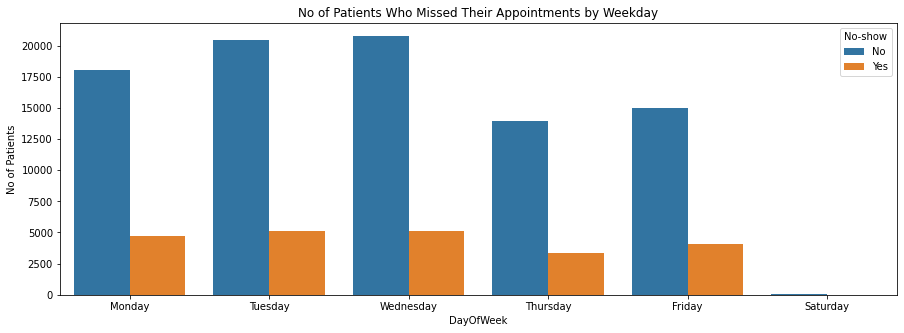

In [141]:
#Plot the distribution of Patient's Appointment Attendance By Weekday 
DayOfWeek = dataset[['DayNo','DayOfWeek','No-show']].value_counts().to_frame().sort_values('DayNo').reset_index()
fig = plt.figure(figsize=(15,5))
sns.barplot(x='DayOfWeek', y=0,hue='No-show',data=DayOfWeek);
plt.ylabel('No of Patients')
plt.title('No of Patients Who Missed Their Appointments by Weekday')
plt.show()

> From the chart above, Most patients prefer fixing their appointments to the hospitals on Thursdays through the weekend.

No-show               No    Yes
MonthNo MonthName              
4       April       2602    633
5       May        64037  16804
6       June       21569   4882


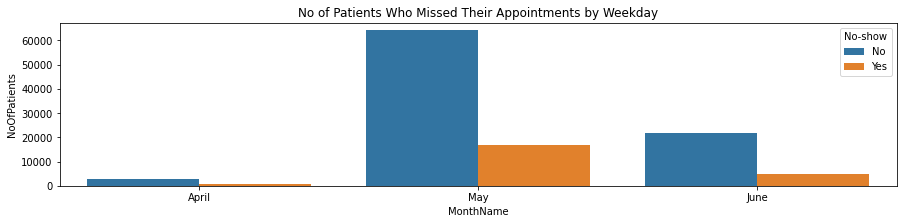

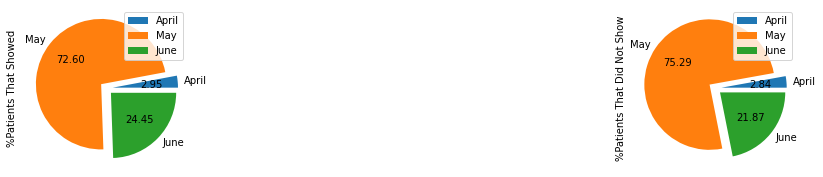

In [142]:
#Plot the distribution of Patient's Appointment Attendance By Weekday 
MonthName = dataset[['MonthNo','MonthName','No-show']].value_counts().to_frame().sort_values('MonthNo').reset_index()
MonthName.rename(columns={0:'NoOfPatients'},inplace=True)
fig,ax0 = plt.subplots(1,1,figsize=(15,3))
# Condition for No Show
NoShow = MonthName['No-show'] == 'Yes'
#COndition for Show
Show = MonthName['No-show'] == 'No'
# Showsummary table
print(MonthName.pivot(index=['MonthNo','MonthName'],columns='No-show', values = 'NoOfPatients'))
sns.barplot(x='MonthName', y='NoOfPatients',hue='No-show',data=MonthName);
ax0.set_title('No of Patients Who Missed Their Appointments by Weekday')
fig,(ax1,ax2) =plt.subplots(1,2,figsize=(20,3))
MonthName[NoShow].set_index('MonthName').plot(ax=ax2,ylabel='%Patients That Did Not Show',kind='pie',subplots=True, y='NoOfPatients', fontsize=10, autopct='%.2f',figsize=(5,5),explode=[0.1,0.1,0.1]);
ax1.set_title = '% of Patients Who Missed their Appointment'
# Show PlotforNo Show
MonthName[Show].set_index('MonthName').plot(ax=ax1,kind='pie',ylabel='%Patients That Showed',subplots=True, y='NoOfPatients', fontsize=10, autopct='%.2f',figsize=(3,3),explode=[0.1,0.1,0.1]);
plt.plot();

> As shown above, May had the highest Number of Appointments.

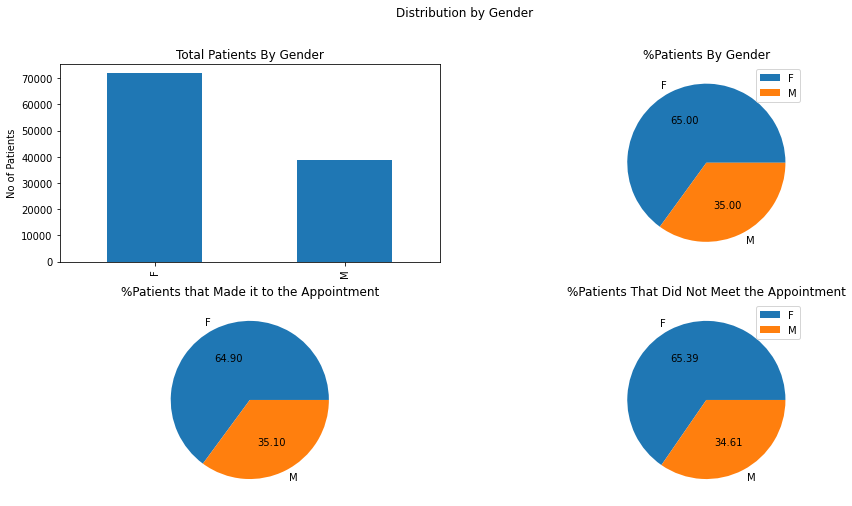

In [143]:
# No of Participants by Gender

Gender= dataset[['Gender','No-show']]
NoShow = Gender['No-show'] == 'Yes'
Show = Gender['No-show'] == 'No'
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,8))
Gender['Gender'].value_counts().plot(ax=ax1,subplots=True,kind='bar',ylabel='No of Patients', label='')
ax1.title.set_text('Total Patients By Gender')
Gender['Gender'].value_counts().plot(ax=ax2,label='', stacked=True,title='Distribution by Gender',subplots=True,kind='pie', autopct='%.2f',legend=['No-Show'])
ax2.title.set_text('%Patients By Gender')
Gender[Show]['Gender'].value_counts().plot(ax=ax3,subplots=True,kind='pie', autopct='%.2f', stacked=True,label='')
ax3.title.set_text('%Patients that Made it to the Appointment')
Gender[NoShow]['Gender'].value_counts().plot(ax=ax4,label='',subplots=True,kind='pie', autopct='%.2f',legend=['No-Show'])
ax4.title.set_text('%Patients That Did Not Meet the Appointment')
plt.plot();

> The data above shows that over 65% dominate the patients. Let's see how patients with other factors keep to appointments.

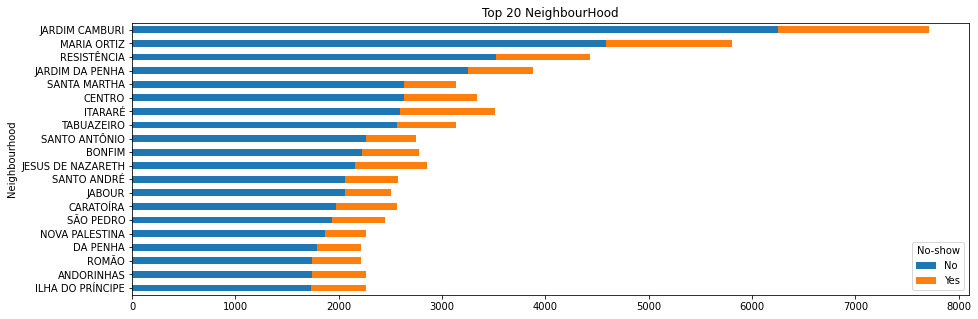

In [195]:
#Get top 20 neighbourhood
pd.set_option("display.max_rows", None)
Top20 = dataset['Neighbourhood'].value_counts().iloc[0:20]
Neighbourhood = dataset[['Neighbourhood','No-show']].value_counts().to_frame().reset_index()
Neighbourhood.rename(columns={0:'NoOfPatients'}, inplace=True)
Neighbourhood = Neighbourhood[Neighbourhood['Neighbourhood'].isin(Top20.index)]
Neighbourhood = Neighbourhood.pivot(index='Neighbourhood',columns='No-show',values='NoOfPatients').sort_values('No')
Neighbourhood.plot.barh(stacked=True, figsize=(15,5));
plt.title('Top 20 NeighbourHood By AppointMents');

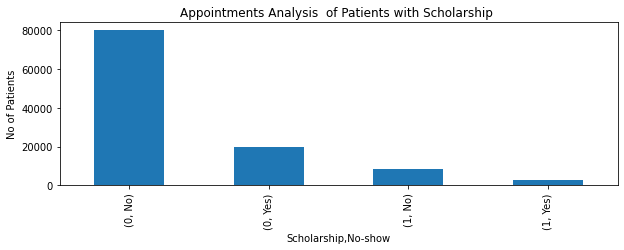

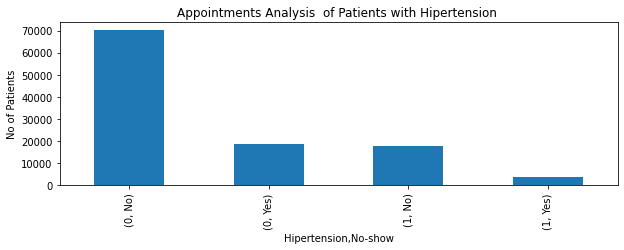

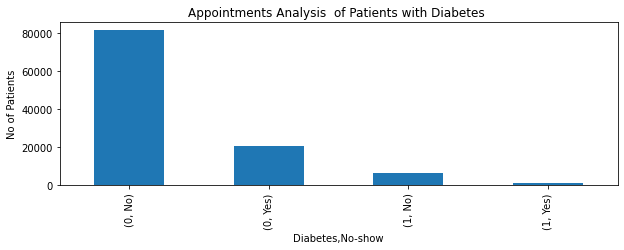

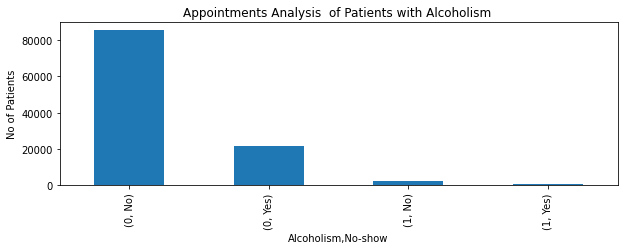

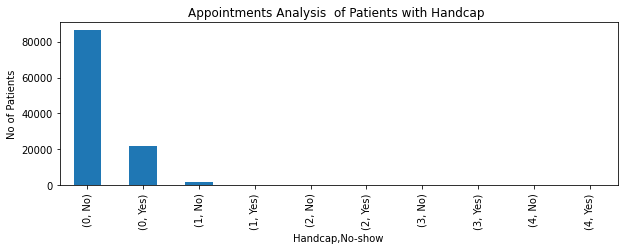

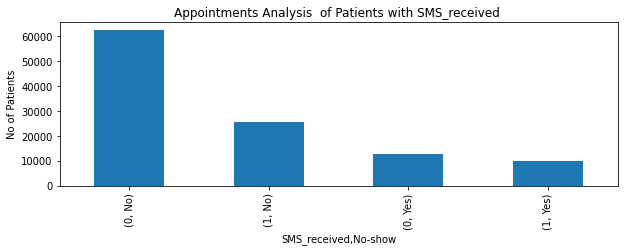

In [196]:
otherfactors = ['Scholarship','Hipertension','Diabetes','Alcoholism','Handcap','SMS_received']

for column in otherfactors:
    fig = plt.figure(figsize=(10,3))
    othercol = [column,'No-show']
    plt.title('Appointments Analysis  of Patients with {} '.format(column))
    plt.ylabel('No of Patients')
    col = dataset[othercol].value_counts()
    col.plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

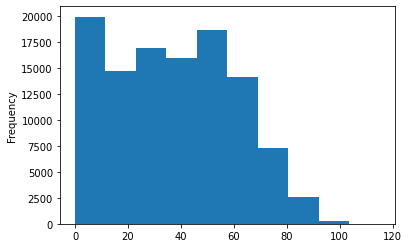

In [200]:
dataset['Age'].plot(kind='hist', bins=10)

### CONCLUSION

> An extensive analysis has been done using the data analysis process. Key findings have been discussed and relevant statistics shown to provide stackholders with the required information to make informed decisions